In [615]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

df = pd.read_csv('train_data_with_cute.csv',encoding = "ISO-8859-1")
to_predict = pd.read_csv('To_predict.csv')


In [616]:
df.columns

Index(['Unnamed: 0', 'Type', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       ...
       'FurLength_Medium', 'FurLength_Short', 'Vaccinated_Not_Sure',
       'Vaccinated_Yes', 'Health_Minor_Injury', 'Health_Serious_Injury',
       'Dewormed_Not_Sure', 'Dewormed_Yes', 'Sterilized_Not_Sure',
       'Sterilized_Yes'],
      dtype='object', length=122)

In [617]:
to_predict.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'PetID', 'AdoptionSpeed', 'Type', 'Age',
       'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt',
       'State', 'Breed', 'Colors'],
      dtype='object')

In [618]:

df = df[['Type','Age','Gender','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','Quantity','Fee','PhotoAmt','AdoptionSpeed','PetScore','Breed','Colors','PetID','Emotion']]
to_predict = to_predict[['Type','Age','Gender','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','Quantity','Fee','PhotoAmt','AdoptionSpeed','Breed','Colors','PetID']]

In [619]:
df

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,PhotoAmt,AdoptionSpeed,PetScore,Breed,Colors,PetID,Emotion
0,Dog,3,Female,Medium,Medium,Not_Sure,Not_Sure,Not_Sure,Healthy,1,0,2,2,7.000,Mixed Breed,"Brown, Cream",c02be41e6,sad
1,Dog,12,Female,Medium,Medium,No,Yes,Yes,Healthy,1,0,7,2,6.125,Mixed Breed,"Brown, White",6436c1a59,happy
2,Dog,4,Mix,Small,Medium,Yes,Yes,Yes,Healthy,2,0,5,3,7.000,Mixed Breed,"Brown, White",1a76190c5,happy
3,Dog,24,Male,Medium,Short,Yes,Yes,No,Healthy,5,0,1,4,6.000,Mixed Breed,"Cream, White",543130f60,timid
4,Cat,3,Female,Small,Short,Yes,No,No,Healthy,1,1,5,4,6.000,Domestic Short Hair,"Black, White",4c6fe4100,playful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Cat,1,Male,Small,Medium,No,No,No,Healthy,1,0,1,2,6.000,Domestic Medium Hair,"Black, Brown",8dc7b3ffa,content
1684,Dog,2,Female,Medium,Medium,No,No,No,Healthy,1,0,5,2,7.000,Mixed Breed,"Brown, White",941880ea3,sad
1685,Dog,24,Female,Medium,Medium,Yes,Yes,Yes,Healthy,1,0,3,4,7.000,Mixed Breed,"Brown, White",c7d02bfca,playful
1686,Dog,60,Female,Medium,Medium,Not_Sure,Not_Sure,Not_Sure,Healthy,1,0,1,4,5.000,Mixed Breed,"Brown, Cream",f5dc70d35,sad


In [620]:
# https://stackoverflow.com/a/42523230
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=True)
        #del df[each]
        df = pd.concat([df, dummies], axis=1)
    return df


def change_types(df:pd.DataFrame)->pd.DataFrame:

    df['Type'] = df.Type.astype('str')
    df['Gender'] = df.Gender.astype('str')
    df['MaturitySize'] = df.MaturitySize.astype('str')
    df['FurLength'] = df.FurLength.astype('str')
    df['Vaccinated'] = df.Vaccinated.astype('str')
    df['Dewormed'] = df.Dewormed.astype('str')
    df['Sterilized'] = df.Sterilized.astype('str')
    df['Health'] = df.Health.astype('str')
    df['Fee'] = df.Fee.astype('int')
    return df

def replace_values(df:pd.DataFrame)->pd.DataFrame:
    df.Type.replace({'1':'Dog','2':'Cat'},inplace = True)
    df.Gender.replace({'1':'Male','2':'Female','3':'Mix'},inplace = True)
    df.MaturitySize.replace({'0':'Not_Specified','1':'Small','2':'Medium','3':'Large','4':'Extra_Large'},inplace = True)
    df.FurLength.replace({'1':'Short','2':'Medium','3':'Long','0':'Not_Specified'},inplace = True)
    df.Vaccinated.replace({'1':'Yes','2':'No','3':'Not_Sure'},inplace = True)
    df.Dewormed.replace({'1':'Yes','2':'No','3':'Not_Sure'},inplace = True)
    df.Sterilized.replace({'1':'Yes','2':'No','3':'Not_Sure'},inplace = True)
    df.Health.replace({'1':'Healthy','2':'Minor_Injury','3':'Serious_Injury','0':'Not_Specified'},inplace = True)
    return df


In [621]:
df = change_types(df)
to_predict = change_types(to_predict)
df = replace_values(df)
to_predict = replace_values(to_predict)

In [622]:
df = one_hot(df, df.loc[:, ["Type", "Gender", "MaturitySize", "Colors", "FurLength", "Vaccinated", "Health",'Dewormed','Sterilized']].columns)
to_predict = one_hot(to_predict, to_predict.loc[:, ["Type", "Gender", "MaturitySize", "Colors", "FurLength", "Vaccinated", "Health",'Dewormed','Sterilized']].columns)


In [623]:
to_predict

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,...,"Colors_Yellow, White",FurLength_Medium,FurLength_Short,Vaccinated_Not_Sure,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes
0,Cat,1,Male,Medium,Medium,Not_Sure,Not_Sure,Not_Sure,Healthy,1,...,0,1,0,1,0,0,1,0,1,0
1,Dog,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,...,0,1,0,0,1,0,0,1,0,0
2,Cat,36,Male,Large,Medium,Yes,Yes,Yes,Healthy,1,...,0,1,0,0,1,0,0,1,0,1
3,Cat,1,Female,Small,Short,No,Yes,No,Healthy,1,...,0,0,1,0,0,0,0,1,0,0
4,Cat,1,Male,Small,Short,No,No,No,Healthy,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Cat,3,Female,Small,Medium,No,No,No,Healthy,1,...,0,1,0,0,0,0,0,0,0,0
1396,Dog,4,Female,Medium,Short,Yes,Yes,Yes,Healthy,1,...,0,0,1,0,1,0,0,1,0,1
1397,Cat,2,Female,Medium,Short,No,Yes,No,Healthy,3,...,0,0,1,0,0,0,0,1,0,0
1398,Dog,3,Male,Medium,Medium,Yes,Yes,No,Healthy,1,...,0,1,0,0,1,0,0,1,0,0


In [624]:
df_petid = df.PetID
to_predict_petid = to_predict.PetID
df_adoptionspeed = df.AdoptionSpeed
to_predict_adoptionspeed = to_predict.AdoptionSpeed
df_emotion = df.Emotion
df = df.drop(['Emotion','AdoptionSpeed','PetID','Type','Gender','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','Breed','Colors','Health_Serious_Injury'],axis = 1)
to_predict = to_predict.drop(['AdoptionSpeed','PetID','Type','Gender','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','Breed','Colors'],axis = 1)

In [625]:
df

,Age,Quantity,Fee,PhotoAmt,PetScore,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,...,"Colors_Yellow, White",FurLength_Medium,FurLength_Short,Vaccinated_Not_Sure,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes
0,3,1,0,2,7.000,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,12,1,0,7,6.125,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,4,2,0,5,7.000,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,24,5,0,1,6.000,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,3,1,1,5,6.000,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1,1,0,1,6.000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1684,2,1,0,5,7.000,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1685,24,1,0,3,7.000,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
1686,60,1,0,1,5.000,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0


In [626]:
to_predict

,Age,Quantity,Fee,PhotoAmt,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,...,"Colors_Yellow, White",FurLength_Medium,FurLength_Short,Vaccinated_Not_Sure,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes
0,1,1,0,2.0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,1,1,0,7.0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,36,1,0,3.0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,1,0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,1,0,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3,1,0,2.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1396,4,1,0,5.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1397,2,3,0,16.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1398,3,1,0,7.0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [627]:
for i in df.columns:
    if i not in to_predict.columns:
        print(i)


PetScore


In [628]:
df['PetScore'] = df.PetScore.round()
df['PetScore'] = df.PetScore.astype('str')


In [629]:
y_train = df['PetScore']
X_train = df.drop(['PetScore'],axis = 1)
X_test = to_predict
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [630]:
y_pred
len(y_pred)


1400

## sum squared errors = 2786 before

In [631]:
sum_squared = 0
for i,j in zip(y_pred,y_test.values):
    sum_squared += (float(i)-float(j))**2
    #print((float(i)-float(j))**2)
sum_squared  

2776.0

In [632]:
to_predict['PetScore']=y_pred

(array([500., 137.,  93., 300.,  47., 218.,  79.,   4.,  20.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

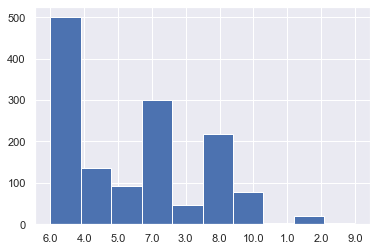

In [633]:
import matplotlib.pyplot as plt
plt.hist(to_predict.PetScore)



In [634]:
to_predict

,Age,Quantity,Fee,PhotoAmt,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,...,FurLength_Medium,FurLength_Short,Vaccinated_Not_Sure,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes,PetScore
0,1,1,0,2.0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,6.0
1,1,1,0,7.0,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,6.0
2,36,1,0,3.0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,4.0
3,1,1,0,1.0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,5.0
4,1,1,0,1.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3,1,0,2.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,6.0
1396,4,1,0,5.0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,6.0
1397,2,3,0,16.0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,5.0
1398,3,1,0,7.0,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,4.0


In [635]:
df

,Age,Quantity,Fee,PhotoAmt,PetScore,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,...,"Colors_Yellow, White",FurLength_Medium,FurLength_Short,Vaccinated_Not_Sure,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes
0,3,1,0,2,7.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,12,1,0,7,6.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,4,2,0,5,7.0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,24,5,0,1,6.0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,3,1,1,5,6.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1,1,0,1,6.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1684,2,1,0,5,7.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1685,24,1,0,3,7.0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
1686,60,1,0,1,5.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0


## Predicting Emotion

In [636]:
df['Emotion'] = df_emotion
df_petscore = df.PetScore
to_predict_petscore = to_predict.PetScore
df.drop("PetScore",axis = 1,inplace = True)
to_predict.drop("PetScore",axis = 1,inplace = True)

In [637]:
y_train = df['Emotion']
X_train = df.drop(['Emotion'],axis = 1)
X_test = to_predict
knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [638]:
to_predict['Emotion']=y_pred

(array([585.,  67.,   0., 276.,   0., 240., 201.,   0.,  17.,  14.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

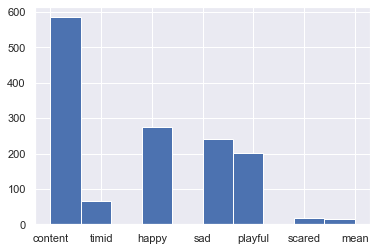

In [639]:
import matplotlib.pyplot as plt
plt.hist(to_predict.Emotion)


In [640]:
df.Emotion.value_counts()
to_predict.Emotion.value_counts()

content    585
happy      276
sad        240
playful    201
timid       67
scared      17
mean        14
Name: Emotion, dtype: int64

In [641]:
df['PetScore'] = df_petscore
to_predict['PetScore']=to_predict_petscore
df['PetID'] = df_petid
df['AdoptionSpeed']=df_adoptionspeed
to_predict['PetID']=to_predict_petid
to_predict['AdoptionSpeed']=to_predict_adoptionspeed

In [642]:
concatted = pd.concat([df,to_predict])

In [643]:
concatted

,Age,Quantity,Fee,PhotoAmt,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,...,Vaccinated_Yes,Health_Minor_Injury,Dewormed_Not_Sure,Dewormed_Yes,Sterilized_Not_Sure,Sterilized_Yes,Emotion,PetScore,PetID,AdoptionSpeed
0,3,1,0,2.0,1,0,0,0,1,0,...,0,0,1,0,1,0,sad,7.0,c02be41e6,2
1,12,1,0,7.0,1,0,0,0,1,0,...,0,0,0,1,0,1,happy,6.0,6436c1a59,2
2,4,2,0,5.0,1,0,1,0,0,1,...,1,0,0,1,0,1,happy,7.0,1a76190c5,3
3,24,5,0,1.0,1,1,0,0,1,0,...,1,0,0,1,0,0,timid,6.0,543130f60,4
4,3,1,1,5.0,0,0,0,0,0,1,...,1,0,0,0,0,0,playful,6.0,4c6fe4100,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3,1,0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,content,6.0,472e86a83,4
1396,4,1,0,5.0,1,0,0,0,1,0,...,1,0,0,1,0,1,timid,6.0,ac6d69d99,4
1397,2,3,0,16.0,0,0,0,0,1,0,...,0,0,0,1,0,0,content,5.0,54b6c1d72,3
1398,3,1,0,7.0,1,1,0,0,1,0,...,1,0,0,1,0,0,content,4.0,cca88204d,2


In [645]:
updated_train = pd.read_csv('updated_train.csv')
temp_merge = pd.merge(concatted,updated_train,how = 'left',on = ['PetID'])
temp_merge

concatted['Breed'] = temp_merge['Breed']
concatted = one_hot(concatted, concatted.loc[:, ["Breed","Emotion"]].columns)
concatted

,Age,Quantity,Fee,PhotoAmt,Type_Dog,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,...,Emotion_playful,"Emotion_playful,sad","Emotion_playful,scared","Emotion_playful,timid",Emotion_sad,"Emotion_sad,scared","Emotion_sad,timid",Emotion_scared,"Emotion_scared,timid",Emotion_timid
0,3,1,0,2.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,12,1,0,7.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,0,5.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,24,5,0,1.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1,1,5.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3,1,0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1396,4,1,0,5.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1397,2,3,0,16.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1398,3,1,0,7.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [646]:
concatted.to_csv('3k_pets_with_scores_and_emotion.csv')

In [484]:
ten_k = pd.read_csv('10k_files.csv')
ten_k

grouped = ten_k.groupby(ten_k.files.str[13:22])

In [499]:
list_of_pets = []
for i,j in grouped:
   
    if i not in concatted.PetID.values:
        pass
    else:
        j['PetScore'] = concatted[concatted['PetID']==i].PetScore.values[0]
        list_of_pets.append(j)

x = pd.concat(list_of_pets)
x

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,files,PetScore
7333,7333,train_images/0011d7c25-2.jpg,7.0
7334,7334,train_images/0011d7c25-3.jpg,7.0
7335,7335,train_images/0011d7c25-1.jpg,7.0
8393,8393,train_images/00156db4a-5.jpg,6.0
8394,8394,train_images/00156db4a-4.jpg,6.0
...,...,...,...
2727,2727,train_images/fff6f2f61-1.jpg,8.0
4093,4093,train_images/fffa39a6a-2.jpg,6.0
4094,4094,train_images/fffa39a6a-1.jpg,6.0
2721,2721,train_images/fffd78a11-2.jpg,10.0


In [501]:
x.to_csv('10k_files_w_scores.csv')